# DTSC-670 Final Project
## Student Data Predictions
## Name: Judson Tillotson

## Overview

### Business Problem
Utilizing student data we can predict how students will perform in the upcoming term. That allows us to identify which students need a little extra help (assistance or interventions) to improve their grade. This would also allow us to identify which students are most likely to pass with flying colors, which allows us to identify students for gifted or similar program.

### Frame the Problem
I believe a supervised model that is offline is best to help us predict this data. Supervised data just means we will have labels for our data, and offline, which means we will train on a batch of data all at once. The main disadvantage to this is we will need to incrimently need to retrain data, which actually helps us as every year we will need to revisit our model to tweak it for the upcoming students. Every class is different, and they have different traits, so tweaks will undoubtedly need to happen.

### Machine Learning Task
When it comes to supervised machine learning, there are two main types: Classification and Regression.
Classification is classifying students into a bin/group, and regression is predicting exact values. I believe as a data scientist that a Regression task makes much more sense for this exercise. There will undoubtedly be a little bit of error in our model, which means that even if we have students that are close to the line, we need to know that. Therefore we will need to have the exact number to help see who is even close to failing a class, or close to dropping a grade. 

### Metrics
To measure how effective this model is, I will be creating a testing data set and run it on the model. As we know the actual grades for this data set, we will be able to tell the models error using a Mean square error, and I will also use an r2_score. 

Mean square error measures the average squared distance between the predicted and actual data points. In this case it would be the predicted grade and the actual data value. 

An r2_score is the determination of the proportion of variance in the G3 score that is predicted by the rest of the data. It is how well the regression model predicts the output data. 

### Everything Else
We want to help kids succeed, and this model will help us be able to accurately predict the grade of our students. This allows us to identify failing risks and bad behaviors/traits that leads to an increase in failing. We as stakeholders in the education system of this school want to help our students pass but also learn what good behaviors look like, which this model can help us identify which good behaviors lead to more passing.

## Get the Data

### Data Import
First we have our standard imports, plus importing the data

In [1]:
import numpy as np
import pandas as pd 

student_data = pd.read_csv('student-mat.csv')

### What does the data look like?

In [2]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,1.0,1.0,4.0,5,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,3,1,1,3,NaN,NaN,NaN,5,5,6
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,2,2,3,3,1.0,1.0,8.0,7,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,2,1,1,5,0.0,0.0,2.0,15,14,15
4,GP,F,NaN,U,GT3,T,3,3,other,other,...,2,1,2,5,0.0,0.0,4.0,6,10,10


Already this tells me that we have some missing data, both in the absences but also in the age. It also helps us have context for what the column names and information above shows up in the data frame.

In [3]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       395 non-null    object 
 1   sex          395 non-null    object 
 2   age          383 non-null    float64
 3   address      395 non-null    object 
 4   famsize      395 non-null    object 
 5   Pstatus      395 non-null    object 
 6   Medu         395 non-null    int64  
 7   Fedu         395 non-null    int64  
 8   Mjob         395 non-null    object 
 9   Fjob         395 non-null    object 
 10  reason       395 non-null    object 
 11  guardian     395 non-null    object 
 12  traveltime   395 non-null    int64  
 13  studytime    395 non-null    int64  
 14  failures     395 non-null    int64  
 15  schoolsup    395 non-null    object 
 16  famsup       395 non-null    object 
 17  paid         395 non-null    object 
 18  activities   395 non-null    object 
 19  nursery 

This gives us the assurance that yes we have the right column names, but it also helps us see which columns are integers (1,2,3 etc.), which are float(1,1.1,1.001 etc.), and which are categories or words, which show up as object type. 

In [4]:
student_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2,G3
count,383.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,381.000000,381.000000,381.000000,395.000000,395.000000,395.000000
mean,16.699739,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,0.669291,0.669291,4.325459,10.908861,10.713924,10.415190
std,1.280615,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,1.300132,1.300132,5.526882,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.000000,0.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,1.000000,1.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,12.000000,12.000000,51.000000,19.000000,19.000000,20.000000


This allows me to see what each numerical column looks like individually. 
To note, we have some students as old as 22, and the mean study time is larger than 2 hours per week.
Also to note, Absences in G3 is dramatically larger than the other two. Even the largest in G1, G2 were only 12, but in G3, we have a max of 51 absences, which is astonishing, and that student definitly needs a talk, or maybe it was a medical issue or something. Either way, the student has been gone a lot. Even taking that aside, the 75th percentile is 6, whereas in G1,G2, both were only 1. That is 500% growth on previous. That shows that more students have been gone more. 

In [5]:
student_data.size

13825

In [6]:
student_data.shape

(395, 35)

### Column list

school, student's school ("GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)

sex, student's sex ("F" - female or "M" - male)

age, student's age (numeric from 15 to 22)

address, student's home address type ("U" - urban or "R" - rural)

famsize, family size ("LE3" - less or equal to 3 or "GT3" - greater than 3)

Pstatus, parent's cohabitation status ("T" - living together or "A" - apart)

Medu, mother's education (0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Fedu, father's education (0 - none, 1 - primary education (4th grade), 2 – 5th to 9thgrade, 3 – secondary education or 4 – higher education)

Mjob, mother's job ( "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")

Fjob, father's job ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")



reason, reason to choose this school (close to "home", school "reputation", "course" preference or "other")

guardian, student's guardian ("mother", "father" or "other")

traveltime, home to school travel time (1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime, weekly study time (1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures, number of past class failures (n if 1<=n<3, else 4)


schoolsup, extra educational support (yes or no)

famsup, family educational support (yes or no)

paid, extra paid classes within the course subject (Math or Portuguese) (yes or no)

activities, extra-curricular activities (yes or no)

nursery, attended nursery school (yes or no)


higher, wants to take higher education (yes or no)

internet, Internet access at home (yes or no)

romantic, with a romantic relationship (yes or no)

famrel, quality of family relationships (from 1 - very bad to 5 - excellent)

freetime, free time after school (from 1 - very low to 5 - very high)

goout, going out with friends (from 1 - very low to 5 - very high)

Dalc, workday alcohol consumption (from 1 - very low to 5 - very high)

Walc, weekend alcohol consumption (from 1 - very low to 5 - very high)

health, current health status (from 1 - very bad to 5 - very good)

absences_G1, number of school absences for G1 term (numeric)

absences_G2, number of school absences for G2 term (numeric)

absences_G3, number of school absences for G3 term (numeric)

G1, first term grade (numeric: from 0 to 20)

G2, second term grade (numeric: from 0 to 20)

G3, final grade (numeric: from 0 to 20)


### Target
Our target that we want to predict is the G3 grade, We want to know what the final grade is, as that is when passing or failing grades occur. 

### Train/Test splitting
I am going to break our data into our training and testing data. 
Because our model wants to predict the final grade, I will set this our output.
I am setting the random_state to 42 to allow you to reproduce this model and will keep the same outputs.

In [7]:
from sklearn.model_selection import train_test_split

X=student_data.drop(columns='G3')
y=student_data.loc[:,'G3']

X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
y_train, y_test = train_test_split(y,test_size=0.2, random_state=42)

## Explore the Data

### Study

In [8]:
#student_data.value_counts()

Thought that would be helpful, but the value counts was a jumbled mess.

### Visualizations

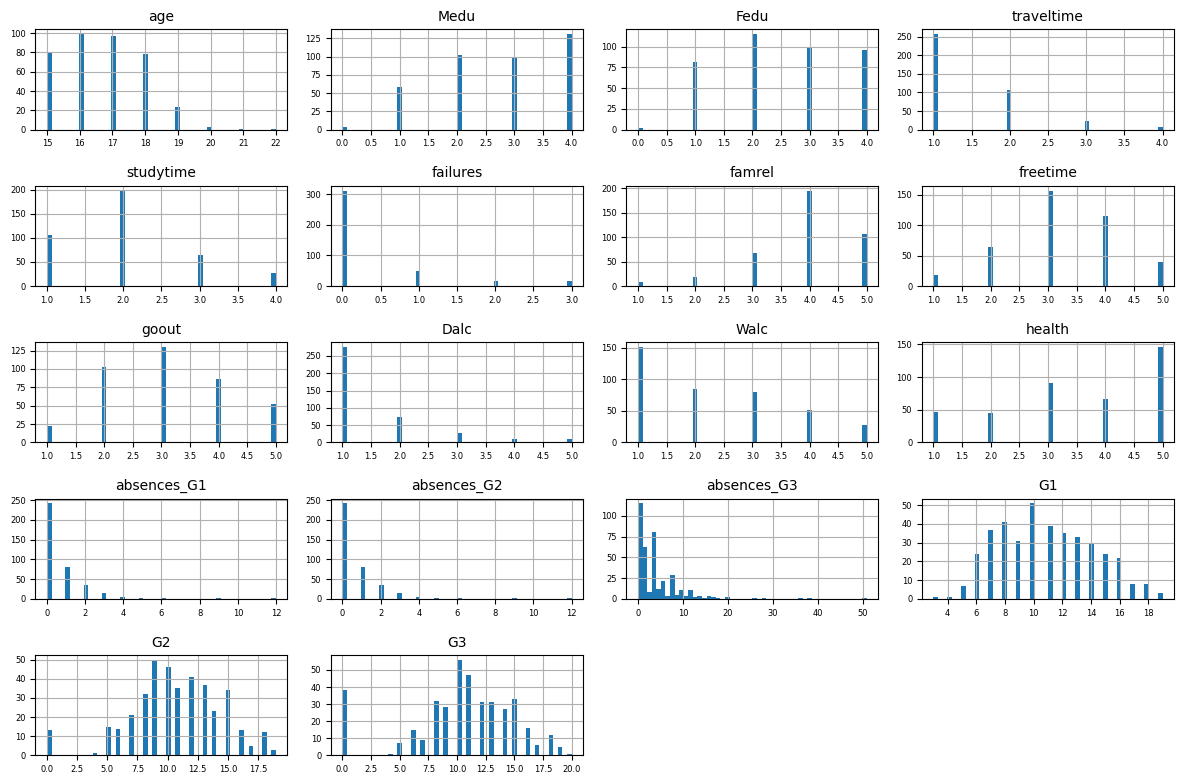

In [9]:
import matplotlib.pyplot as plt

plt.rc('font', size=12)
plt.rc('axes', labelsize=12, titlesize=10)
plt.rc('legend', fontsize=6)
plt.rc('xtick', labelsize=6)
plt.rc('ytick', labelsize=6)


# plots histograms of numerical data
student_data.hist(bins=50, figsize=(12, 8))
plt.tight_layout()
plt.show()

The following groups of histograms give us some data on the norms. What is the normal age of the students, how often on average do they go out, etc. 

Looking at each column separately gives us information. For example, For Mother's Education, the norm appears to be higher education, but for the Father's Education, the largest grouping is at a 5th to 9th grade education. Which is interesting. 

For Studytime, the plurality of students study between 2 and 5 hours per week, which shows good study behavior, and if we extend that from 2 to >10 hours, then it is a sheer majority. 

For failures, this shows that the vast majority has never failed a class before.

Famrel shows us that the majority have good relationships at home. 

One very important thing to note is that absences goes up quite a bit for some students when it gets to G3. The most absences in G1 and G2 was 12, but that skyrockets to about 50 in G3. We want to note that, as with that variability in the term that we are trying to predict, if we have error, it may be due to extra absences. Now some of those kids might be the ones that have given up, and they had tried in the first 2 terms, and just decided to give in to fate, but we cannot say that for certain. 
That theory is backed up a little by how the number of failures right around 0 dramatically increases as the year goes on. 

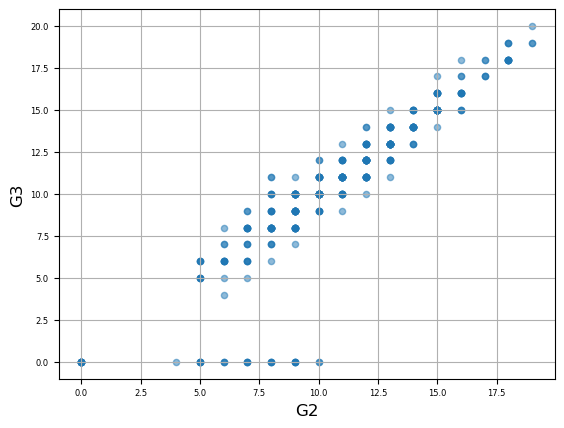

In [10]:
student_data.plot(kind="scatter", x="G2", y="G3",
             alpha=0.5, grid=True)
plt.show()

As expected, G2 has a very linear looking pattern when compared with G3. That makes sense, the better you do in the previous term, the more likely you will do well in the next term.

<Axes: title={'center': 'G3'}, xlabel='romantic'>

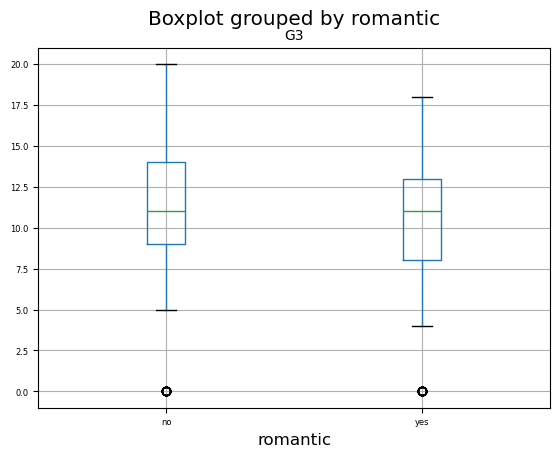

In [11]:
student_data.boxplot(column='G3', by='romantic')

The sterotype of when teenagers are in a relationship, their grades suffer shows itself to be kind of true. G3 scores seem higher for the lower group, the no relationship squad. If they are in a relationship, it appears to be a little lower. ~65% of students not in a relationship are passing, whereas ~58% of students are passing of the students who are in a relationship.  

<Axes: title={'center': 'G3'}, xlabel='Pstatus'>

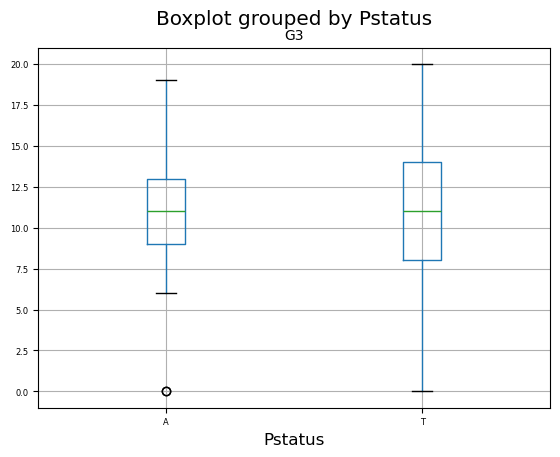

In [12]:
student_data.boxplot(column='G3', by='Pstatus')


When parents are together, students have two people reminding them of their homework, or asking them how they are doing etc. 

I thought it would be appropro to check and see if that is backed up in the data, and it appears to be a little true. However I do not think we can safely say that this is a slam dunk. There appears to be more students failing with their parents together than with parents Apart. 

<Axes: title={'center': 'G3'}, xlabel='famsup'>

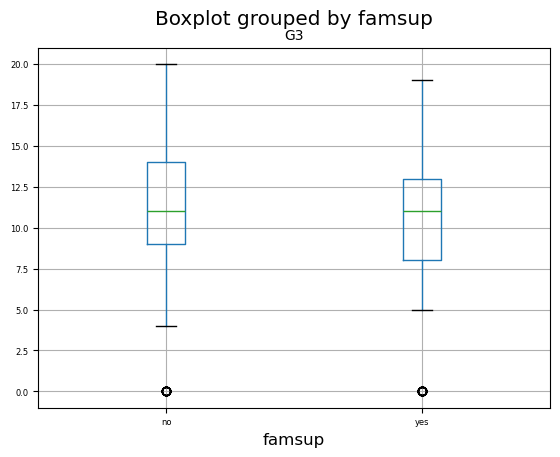

In [13]:
student_data.boxplot(column='G3', by='famsup')

I thought it would be good to check if a student had more family support would they be more likely to pass. It does not appear so. 

<Axes: title={'center': 'G3'}, xlabel='studytime'>

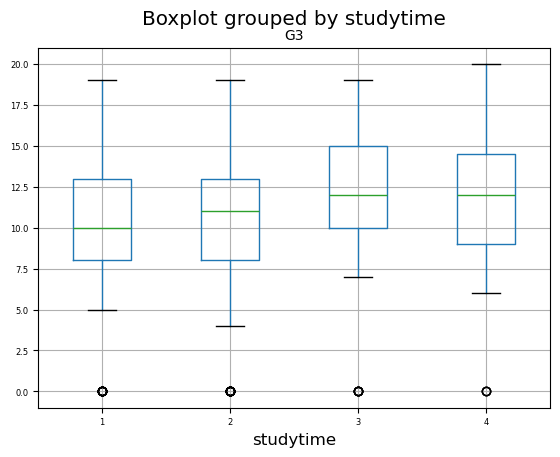

In [14]:
student_data.boxplot(column='G3', by='studytime')

Studytime appears to be a great predictor, the students who study more seem to have a higher median, and the lower end of the box plots are on average higher the more they study. However, at least one from each group still got a 0 in the third term.

### Correlations Check

In [15]:
num_cols = ['age','Medu','Fedu','traveltime','studytime','failures','famrel',
            'freetime','goout','Dalc','Walc','health','absences_G1','absences_G2','absences_G3','G1','G2','G3']

# compute correlations
corr_matrix = student_data[num_cols].corr()
corr_matrix["G3"].sort_values(ascending=False)

G3             1.000000
G2             0.904868
G1             0.801468
Medu           0.217147
Fedu           0.152457
studytime      0.097820
absences_G3    0.067294
famrel         0.051363
absences_G1    0.012485
absences_G2    0.012485
freetime       0.011307
Walc          -0.051939
Dalc          -0.054660
health        -0.061335
traveltime    -0.117142
goout         -0.132791
age           -0.152762
failures      -0.360415
Name: G3, dtype: float64

As expected, G2 and G1 grades are by far the highest correlated groups for the numerical columns. Way in 3rd place is the failures with an inverse relationship, then Mothers/Fathers education come in fairly close together. Age and Going out also have an inverse relationship with G3, which makes sense as older students have likely failed before, and the more you go out, the less time you spend studying as time is not infinite.

G2 and G1 scores are highly correlated with G3 scores, and nothing else is even moderately correlated. 

## Prepare the Data

### Custom Transformer

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin

absences_G1_ix, absences_G2_ix, absences_G3_ix, G1_ix, G2_ix = 12,13,14,15,16

class FinalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, drop_grades):
        self.drop_grades = drop_grades

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        new_column = X[:, absences_G1_ix ] + X[:,absences_G2_ix] + X[:, absences_G3_ix]
        
        if self.drop_grades:
            X_drop_grades = np.delete(X,[G1_ix,G2_ix],1)
            X_drop_grades = np.delete(X_drop_grades,[absences_G1_ix, absences_G2_ix, absences_G3_ix],axis=1)
            return np.c_[X_drop_grades, new_column]
        else:
            X_drop = np.delete(X,[absences_G1_ix, absences_G2_ix, absences_G3_ix],axis=1)
            return np.c_[X_drop, new_column]

G1 absences, G2 absences, and G3 absences give us some important data, but if we were to add those up to total absences, we will have more useful data. 

On a separate note, if we could predict out outcomes without using G1 and G2 scores, than this model would be much more helpful. So I am laying the groundwork to be able to remove G1 and G2 or not depending on if I wanted to. 
This allows us, as you will see below, to break everything into a couple different possibilties. If we keep our previous scores or not. 

This custom transformer allows us to be more flexible. 

### Pipeline

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel

num_pipeline_1 = make_pipeline(
        (SimpleImputer(strategy="mean")), 
      #  (MinMaxScaler()),
        (FinalTransformer(drop_grades = True)),
        (StandardScaler()), 
    )
num_pipeline_2 = make_pipeline(
        (SimpleImputer(strategy="mean")), 
      #  (MinMaxScaler()),
        (FinalTransformer(drop_grades = False)),
        (StandardScaler()), 
    )

I created 2 separate pipelines depending on if we were going to keep our grade data or not. Thus, we can transform our data twice below. 
I also wanted to impute the means into our missing values, that way we can keep it as close as possible, and who knows if the data being input into this model will have all the columns completed or not.

Next I scaled my data to allow it to be standardized. Standardizing your data allows for consistency among the various columns, thereby allowing it to be easier to understand and use. 

I used the Final Transformer that I created above, the top pipline is creating out dataset with dropping the grades. This is where that happens. 

### Non-Numeric Data

In [18]:
cat_pipeline = make_pipeline(
        SimpleImputer(strategy="most_frequent"),
        OneHotEncoder(drop='first',sparse_output=False),
    )

We unfortunately do not have all numeric data, so we need to work with our "object" columns. Here I created a pipline to allow us to process out categorical data as well, with the SimpleImputer fixing any missing data with whatever our Mode or most frequent data value for the various columns are. That allows us to have the understanding and assurance that any future data has the appropriate columns all filled. 

The One Hot Encoder allows us to treat the categorical data as numerical data for the below Machine Learning Algorithm. It creates several new columns of 1's and 0's for each categorical group, and then it will drop the first column to simplify our data set down. It Encodes our data into a language that the computer can understand. That is the standard practice during One Hot Encoding.

### Column Transformer

In [19]:
num_attributes = ['age','Medu','Fedu','traveltime','studytime','failures','famrel',
                  'freetime','goout','Dalc','Walc','health','absences_G1','absences_G2','absences_G3','G1','G2']
cat_attributes = ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery',
                  'higher','internet','romantic']

Now as previously discovered, we do not have all numerical columns, but we do not want to disregard that data, because it could be the difference between a good model and a bad one. So, we need to separate our columns to numerical and not. Above I went through and typed them out. 

There are ways to do it without writing out every column name, but I wanted to make sure that I was not missing any.

In [20]:
from sklearn.compose import ColumnTransformer

preprocessing_1 = ColumnTransformer([
        ("num", num_pipeline_1, num_attributes),
        ("cat", cat_pipeline, cat_attributes),
])

preprocessing_2 = ColumnTransformer([
        ("num", num_pipeline_2, num_attributes),
        ("cat", cat_pipeline, cat_attributes),
])

Here is our column transformer, which utilizes the above pipelines on our data, I created the two transformers. The transformers are combining everything above and gets it ready to process the data before trying to do any predictions.

### Transform the Two training sets

In [21]:
X_train_2=X_train.copy()

As we have two transformers, I want two sets of data, one with the grades and one without. So I am copying the data so there is no overriding.

In [22]:
X_train_prepared_grades = preprocessing_2.fit_transform(X_train)


In this cell we prepare the train data with grades by fitting and transforming our data to our processing column transformer and pipelines created above.

In [23]:
X_train_prepared_grades.shape

(316, 41)

As you can see, our shape is 316 rows by 41 columns. 

In [24]:
X_train_prepared_no_grades = preprocessing_1.fit_transform(X_train_2)

Using our copy of our data so that we have no override from the previous processing, we fit and transform our data and get rid of the grade columns.

In [25]:
X_train_prepared_no_grades.shape

(316, 39)

This shape is 316 rows by 39 columns. That means that we have successfully dropped our grade columns. 

## Promising Models

### Models

In [26]:
from sklearn.linear_model import LinearRegression

ols_model=LinearRegression()
ols_model_grades = ols_model.fit(X_train_prepared_grades,y_train)
ols_model_no_grades = ols_model.fit(X_train_prepared_no_grades,y_train)

One of the most common models for Machine learning algorithms is Linear Regression, so this is one I have chosen to try.

In [27]:
from sklearn.linear_model import SGDRegressor

sgd_model=SGDRegressor(penalty=None, max_iter=10000, random_state=42, learning_rate='constant', n_iter_no_change=100)
sgd_model_grades = sgd_model.fit(X_train_prepared_grades,y_train)
sgd_model_no_grades = sgd_model.fit(X_train_prepared_no_grades,y_train)

Another I am trying is an SGD Regressor which stands for Stochastic Gradient Descent, which means the loss is estimated each sample at a time, and the model is updated sample by sample until there is a nice regression line created. 

In [28]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(random_state=42)
ridge_model_grades = ridge_model.fit(X_train_prepared_grades,y_train)
ridge_model_no_grades = ridge_model.fit(X_train_prepared_no_grades,y_train)

The third model chosen is a Ridge model. Ridge regresion is a method that strives to reduce errors from overfitting the data. It corrects this errors and allows us to create an unbiased esimator. 

### Comparison

In [29]:
from sklearn.model_selection import cross_val_score
ols_rmses_grades = -cross_val_score(ols_model_grades, X_train_prepared_grades, y_train,
                              scoring="neg_root_mean_squared_error", cv=10)
sgd_rmses_grades =  -cross_val_score(sgd_model_grades, X_train_prepared_grades, y_train,
                              scoring="neg_root_mean_squared_error", cv=10)
ridge_rmses_grades = -cross_val_score(ridge_model_grades, X_train_prepared_grades, y_train,
                              scoring="neg_root_mean_squared_error", cv=10)


I calculated our RMSE, or Root mean square error and I am cross validating our errors based on the data with the grades. This creates 10 scores from each model, and I am going to see which model is best.

In [30]:
ols_grades=pd.Series(ols_rmses_grades)
sgd_grades=pd.Series(sgd_rmses_grades)
ridge_grades=pd.Series(ridge_rmses_grades)

In [31]:
pd.DataFrame([ols_grades,sgd_grades,ridge_grades],index=['linear','SGD','Ridge'])

,0,1,2,3,4,5,6,7,8,9
linear,2.107376,2.110296,1.133887,1.811351,1.936618,1.752874,1.878281,2.414967,1.760654,1.973922
SGD,2.168201,2.243335,1.168754,1.925986,1.760351,1.992761,1.780906,2.540160,1.731210,2.032297
Ridge,2.108159,2.095252,1.131231,1.804911,1.923586,1.748143,1.866757,2.407849,1.745622,1.951590


This created a Series or list for each of the RMSE for the data with grades.

In [32]:
ols_mean_grades=np.mean(ols_rmses_grades)
sgd_mean_grades=np.mean(sgd_rmses_grades)
ridge_mean_grades=np.mean(ridge_rmses_grades)
pd.DataFrame([ols_mean_grades,sgd_mean_grades,ridge_mean_grades],index=['linear','SGD','Ridge'])

,0
linear,1.888023
SGD,1.934396
Ridge,1.878310


Here are the means of the rows above, which allos us to see which model is best (lowest error).

Just to note, Ridge has the lowest error shown, but we will see what happens without the grades. 

In [33]:
ols_rmses_no_grades = -cross_val_score(ols_model_no_grades, X_train_prepared_no_grades, y_train,
                              scoring="neg_root_mean_squared_error", cv=10)
sgd_rmses_no_grades =  -cross_val_score(sgd_model_no_grades, X_train_prepared_no_grades, y_train,
                              scoring="neg_root_mean_squared_error", cv=10)
ridge_rmses_no_grades = -cross_val_score(ridge_model_no_grades, X_train_prepared_no_grades, y_train,
                              scoring="neg_root_mean_squared_error", cv=10)


Here are the RMSE's for the data without grades.

In [34]:
ols=pd.Series(ols_rmses_no_grades)
sgd=pd.Series(sgd_rmses_no_grades)
ridge=pd.Series(ridge_rmses_no_grades)

In [35]:
pd.DataFrame([ols,sgd,ridge],index=['linear','SGD','Ridge'])

,0,1,2,3,4,5,6,7,8,9
linear,4.714669,4.527971,3.561981,4.540446,4.994211,4.768774,4.860172,4.541936,4.201307,4.471549
SGD,4.563440,4.412913,3.853616,4.525851,5.441901,4.959396,4.992357,4.852761,4.151870,4.370891
Ridge,4.680365,4.530450,3.541920,4.528639,4.921382,4.736418,4.844024,4.523779,4.162853,4.389687


Here is the dataframe for the RMSE's for each model without grades.

In [36]:
ols_mean_no_grades=np.mean(ols_rmses_no_grades)
sgd_mean_no_grades=np.mean(sgd_rmses_no_grades)
ridge_mean_no_grades=np.mean(ridge_rmses_no_grades)
pd.DataFrame([ols_mean_no_grades,sgd_mean_no_grades,ridge_mean_no_grades],index=['linear','SGD','Ridge'])

,0
linear,4.518302
SGD,4.612500
Ridge,4.485952


Here is the dataframe for the model rmse's without grades mean. This allows us to tell which model is best on average on the 10 iterations.

Notice that Ridge is our lowest, but our Model's error is over double what the above data with grades had. 
That makes sense, including our column with the largest correlation should help our model be more accurate. 

## Fine-Tune

### Alter Hyperparameters

In [37]:
from sklearn.model_selection import GridSearchCV

ridge_param_grid={'alpha': [.25, .5, .75, 1, 2, 3, 5, 10, 100]}
grid_search_cv_ridge_grades=GridSearchCV(ridge_model,ridge_param_grid, verbose=1,cv=10)
grid_search_cv_ridge_grades.fit(X_train_prepared_grades, y_train)
ridge_model_grades = grid_search_cv_ridge_grades.best_estimator_

Fitting 10 folds for each of 9 candidates, totalling 90 fits


We want to check our chosen model (Ridge model) with various Hyperparameters. Ridge Regression utilizes something called alpha, which controls how regular the data gets, attempting to limit overfitting our training data. 
This is checking 9 different values for alpha, and it is going to chose our best fit for the model with grades. 

In [38]:
grid_search_cv_ridge_no_grades=GridSearchCV(ridge_model,ridge_param_grid, verbose=1,cv=10)
grid_search_cv_ridge_no_grades.fit(X_train_prepared_no_grades, y_train)
ridge_model_no_grades = grid_search_cv_ridge_no_grades.best_estimator_

Fitting 10 folds for each of 9 candidates, totalling 90 fits


We are checking the same alpha values on the data with no grades, but just a note, this may have a different alpha value which helps this particular model be more accurate. We will grab the best estimator in that last line and create our ridge model without grades. 

### Transform Testing Data

In [39]:
X_test_2=X_test.copy()
X_test_prepared_grades = preprocessing_2.transform(X_test)

We are processing our Test data without grades and getting it ready for the following. 

Very important that we do not fit the data to preprocessing. 
For the training data above, we fit and transformed, here just transform, otherwise our data could be biased to our model. 

In [40]:
X_test_prepared_no_grades = preprocessing_1.transform(X_test_2)

Same but with the data without grades.

### Final Model/Performance

In [41]:
ridge_pred_grades=ridge_model_grades.predict(X_test_prepared_grades)
ridge_pred_no_grades=ridge_model_no_grades.predict(X_test_prepared_no_grades)


Here are our predictions both with and without grades utilized.

In [42]:
from sklearn.metrics import mean_squared_error, r2_score

rmse_ridge_grades = mean_squared_error(y_test,ridge_pred_grades,squared=False).round(4)
r2_ridge_grades = r2_score(y_test,ridge_pred_grades).round(4)

In this cell we are checking our model's efficiency by using our mean squared error and an R2 score which we discussed at the beginning. 

In [43]:
print(rmse_ridge_grades)
print(r2_ridge_grades)

2.3177
0.738


For our model with grades, our Mean squared error is at a 2.3177, which is good, the closer to 0 the better.
Our R2 score is at a 0.738, which is almost a pass. Anything above 0.7 is a pass. A 0.738 means that almost 74% of the variation is explained by our predictors. In other words 74ish% is explained, so our model is fairly accurate. 

In [44]:
rmse_ridge_no_grades = mean_squared_error(y_test,ridge_pred_no_grades,squared=False).round(4)
r2_ridge_no_grades = r2_score(y_test,ridge_pred_no_grades).round(4)

In [45]:
print(rmse_ridge_no_grades)
print(r2_ridge_no_grades)

4.1597
0.1561


This is the same steps but for the no grades data. First things we notice is that the RMSE is at a 4.1597, which is ~180% of our model with grades. 
That is not great. 

The worst part is that our R2 score is at a 0.1561, which means that ~16% of the variation is explained. That is not great, so our model without grades is a failure. 

## Conclusion

Our problem that we set out to fix was that too many students were failing. We wanted to set out to fix that by early identification of our At-Risk students and allow us the stakeholders help stop it before it happens. 

Our duty is to help these students before they fall through the cracks and help set up their life to flourish, and this model could help that be done. If we can know who is at risk to fail from the beginning, we could help those students before they dig themselves a hole large enough to swallow their future. 

I set out to create two models, one using their grades from previous terms and one without, so that you could use this model at the beginning of the year, and also before the third term to allow as much flexibility as possible. Utilizing the grades created a model that closely predicts who passes or fails. That means at the beginning of the third term you are more likely to predict who will pass or fail. That makes sense. 

However, our prediction without grades was a failure. It still predicts who will pass or fail, but at a very low rate of success, and that means it is not very accurate. Anything at the beginnning of the year is better than nothing, and it will still allow you as a school identify some students at the beginning of the year to help out. 

## Evaluate

This project was a success as we created and found a model that accurately predicts failures and allows the stakeholders to get in and help the students right the ship before it takes on too much water. 

My pipeline took a long time to get right, as I kept getting error messages and error messages, and I eventually just created two pipelines to help us out in that regard. I believe that was an adequate solution as it worked in the end. 

The second model is a failure, and that bothers me, I wish I could have found a better model to be even more accurate to help catch those students earlier and allow even less problems to happen. However, even one student saved is worth running our data anyways. 

I would utilize this data to evaluate what habits help students succeed. For example, how much studying is best, are nursery's helpful, are students better when parents are together, etc. That way we as a school can release to the students what actually helps them and what does not. A lot of kids want to do what is best for their flourishing, but does not always know what is best, or how to go about finding that answer. We as a school and a community can step in and help show them how to pass and flourish. 